# Hybrid Model 02: Validace modelu (Model Validation)

In [1]:
# Instalace potřebných knihoven
#%pip install pandas
#%pip install numpy

In [2]:
# Import potřebných knihoven
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import ks_2samp, ttest_ind, mannwhitneyu

import pandas as pd
import matplotlib.pyplot as plt

### Načtení reálných a simulačních dat

In [3]:
# Soubor je načten a přiřazen do proměnné ‚df_sim"
other_path = '../../data/04_HybridModel/hybrid_model.csv'
df_sim = pd.read_csv(other_path, header=0)

In [4]:
# Zobrazení prvních 5 řádků datasetu
print('Prvních 5 řádků datového rámce')
df_sim.head(5)

Prvních 5 řádků datového rámce


,x,y,z,dist,time,stochastic_delay,total_time,cum_delay
0,74,459,1284,4840,39,0,39,0
1,-90,4908,2217,4571,38,0,38,0
2,522,3074,26,2718,33,0,33,0
3,425,2247,2739,4318,37,0,37,0
4,516,3425,1590,3308,34,0,34,0


In [5]:
# Základní deskriptivní statistika simulovaného datasetu
df_sim.describe()

,x,y,z,dist,time,stochastic_delay,total_time,cum_delay
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1422.944700,1336.856500,1374.817600,5858.04950,42.074400,4.412000,46.486400,40518.316500
std,1440.916105,1512.725045,805.317921,2172.83209,6.525181,20.073475,21.401834,25846.372615
min,-99.000000,-99.000000,0.000000,1984.00000,30.000000,0.000000,30.000000,0.000000
25%,248.000000,202.000000,676.000000,3918.00000,36.000000,0.000000,36.000000,18370.000000
50%,599.500000,521.000000,1374.500000,5705.00000,42.000000,0.000000,42.000000,36400.000000
75%,2591.250000,2435.000000,2076.000000,7737.25000,48.000000,0.000000,49.000000,63890.000000
max,4599.000000,4949.000000,2749.000000,10789.00000,57.000000,160.000000,215.000000,88240.000000


In [6]:
# Soubor je načten a přiřazen do proměnné ‚df_real"
other_path = '../../data/02_DetermModel/model_data_real.csv'
df_real = pd.read_csv(other_path, header=0)


In [7]:
# Zobrazení prvních 5 řádků datasetu
print('Prvních 5 řádků datového rámce')
df_real.head(5)

Prvních 5 řádků datového rámce


,id,x,y,z,time,delay,type_delay,total_time,dist,time_calc
0,150,1315,220,1000,29,0,0,29,3443,34.828
1,75,220,1190,500,33,0,0,33,3590,35.269
2,239,220,940,2000,35,6,3,41,4387,37.660
3,199,1315,220,1500,36,0,0,36,3636,35.407
4,51,3690,220,250,50,0,0,50,5767,41.800


In [8]:
# Základní deskriptivní statistika simulovaného datasetu
df_real.describe()

,id,x,y,z,time,delay,type_delay,total_time,dist,time_calc
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,139.049689,1314.428571,1091.807453,993.788820,36.285714,5.708075,0.254658,41.993789,3905.074534,36.214224
std,79.374177,1288.402896,1361.839636,702.645843,6.771658,25.355384,0.800621,27.037358,1216.112302,3.648337
min,2.000000,95.000000,95.000000,0.000000,24.000000,0.000000,0.000000,24.000000,1840.000000,30.019000
25%,71.000000,220.000000,220.000000,500.000000,32.000000,0.000000,0.000000,32.000000,2875.000000,33.124000
50%,141.000000,690.000000,220.000000,1000.000000,35.000000,0.000000,0.000000,36.000000,3767.000000,35.800000
75%,203.000000,2440.000000,1565.000000,1500.000000,39.000000,0.000000,0.000000,42.000000,4744.000000,38.731000
max,277.000000,4002.000000,4690.000000,2250.000000,56.000000,200.000000,4.000000,250.000000,6609.000000,44.326000


### Monte Carlo Validation: Opakované podvzorkování na velikost reality

In [9]:
# Bootstrap vzorkování ze simulace na velikost reálného datasetu
n_real = len(df_real)

sim_samples = []

for _ in range(1000):
    sample = df_sim.sample(n=n_real, replace=True, random_state=122 + _)
    sim_samples.append(sample['total_time'])

### KS test pro každé podvzorkování

In [10]:
# Výpočet KS p-hodnot pro porovnání reálných a simulovaných dat
p_vals = []

for s in sim_samples:
    _, p = ks_2samp(df_real['total_time'], s)
    p_vals.append(p)

### Pravděpodobnost shody modelu

In [11]:
valid_ratio = np.mean(np.array(p_vals) > 0.05)

print("Podíl validních simulací:", valid_ratio)

Podíl validních simulací: 0.0


### Distribuce KS p-hodnoty

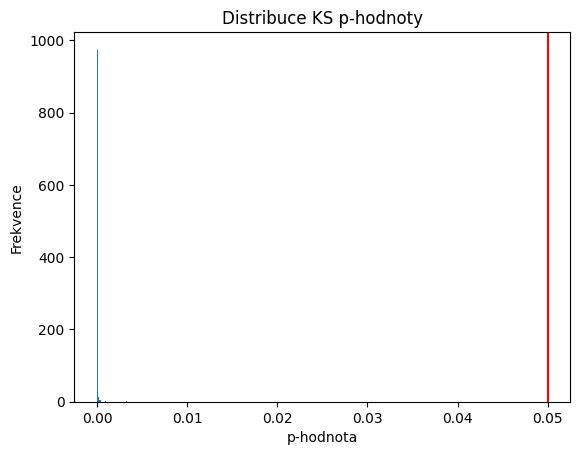

In [12]:
plt.figure()
plt.hist(p_vals, bins=30)
plt.axvline(0.05, color='red')

plt.title("Distribuce KS p-hodnoty")
plt.xlabel("p-hodnota")
plt.ylabel("Frekvence")
plt.show()

### Interpretace (DES validace)
| Podíl | Interpretace |
| ----- | -----------
|0.8 | model VALIDNÍ |
|0.5 – 0.8 | model přijatelný |
|< 0.5 | model nevalidní |

**Parametry nejsou kalibrované**.

### Porovnání průměru a směrodatné odchylky

Reálná data – referenční hodnoty:

In [13]:
# Výpočet průměru a směrodatné odchylky z reálných dat
mean_real = df_real['total_time'].mean()
std_real = df_real['total_time'].std()

print("Real Mean:", mean_real)
print("Real STD:", std_real)

Real Mean: 41.993788819875775
Real STD: 27.037357695975476


Bootstrap ze simulace (na velikost reality):

In [14]:
# velikost reálného datasetu
n_real = len(df_real)

sim_means = []
sim_stds = []

# opakované podvzorkování simulace
for i in range(1000):

    sample = df_sim.sample(
        n=n_real,
        replace=True,
        random_state=122 + i
    )

    sim_means.append(sample['total_time'].mean())
    sim_stds.append(sample['total_time'].std())

### Porovnání průměru

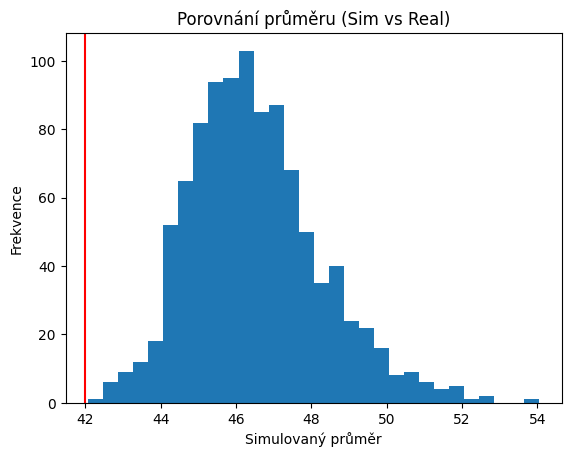

In [15]:
# Histogram průměrů ze simulace s vyznačením průměru reálných dat
plt.figure()

plt.hist(sim_means, bins=30)
plt.axvline(mean_real, color='red')

plt.title("Porovnání průměru (Sim vs Real)")
plt.xlabel("Simulovaný průměr")
plt.ylabel("Frekvence")

plt.show()

### Porovnání STD

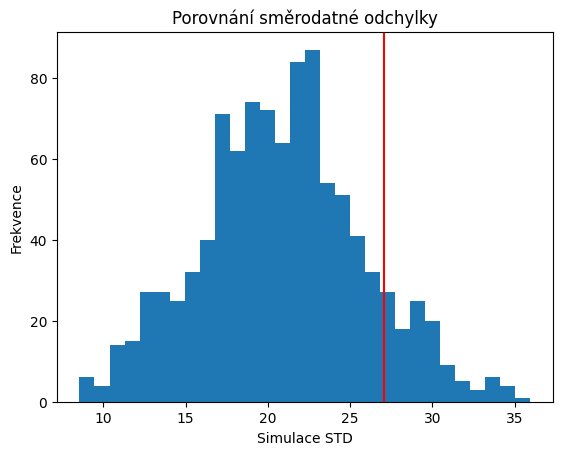

In [16]:
# Histogram STD ze simulace s vyznačením průměru reálných dat
plt.figure()

plt.hist(sim_stds, bins=30)
plt.axvline(std_real, color='red')

plt.title("Porovnání směrodatné odchylky")
plt.xlabel("Simulace STD")
plt.ylabel("Frekvence")

plt.show()

### Kvantilová validace

In [17]:
mean_CI = np.percentile(sim_means, [2.5, 97.5])
std_CI  = np.percentile(sim_stds, [2.5, 97.5])

print("Mean 95% CI:", mean_CI)
print("STD  95% CI:", std_CI)

print("Real mean:", mean_real)
print("Real STD:", std_real)

Mean 95% CI: [43.56490683 50.54161491]
STD  95% CI: [11.39980265 30.74196232]
Real mean: 41.993788819875775
Real STD: 27.037357695975476


Model je validní, ale rozsah hodnot je moc široký -> **simulace není kalibrovaná**.

### Parametrické porovnání dat

### Welchův t-test

In [18]:
stat, p = ttest_ind(
    df_real['total_time'],
    df_sim['total_time'],
    equal_var=False
)

print("Welch t-test p-value:", p)

Welch t-test p-value: 0.0370080094281292


p < 0.05 → simulace má jiný průměr.

### Cohen’s d (velikost efektu)

In [19]:
mean_diff = abs(df_real['total_time'].mean() - df_sim['total_time'].mean())

pooled_std = np.sqrt(
    (df_real['total_time'].std()**2 + df_sim['total_time'].std()**2) / 2
)

d = mean_diff / pooled_std

print("Cohen's d:", d)

Cohen's d: 0.18425210268660908


Cohen's d < 0.2 → zanedbatelný význam

### Neparametrické porovnání (Distribuce)

### Mann–Whitney U test

In [20]:
stat, p = mannwhitneyu(
    df_real['total_time'],
    df_sim['total_time']
)

print("Mann-Whitney p-value:", p)

Mann-Whitney p-value: 3.3892693033431795e-16


### Vyhodnocení shody simulovaných a reálných dat

********
**Bootstrap KS test**

0,00

*Interpretace*:

Ve 0.00 % případů nelze statisticky rozlišit simulaci od reality

********
**STD**

Real STD = 27.037357695975476
STD 95% CI (Sim) [11.39980265 30.74196232]


*Interpretace:*

Reálná směrodatná odchylka je v intervalu, avšak simulace vykazuje nadměrnou variabilitu

*******
**Průměr**

Real Mean = 41.99
Mean 95% CI (Sim) [43.56490683 50.54161491]

*Interpretace:*

Reálný průměr se nachází v intervalu simulace

********
**Welch t-test**

p = 0.0370080094281292

*Interpretace:*

Simulace má jiný průměr.

********
**Cohen’s d**

0.18425210268660908

*Interpretace:*

Malý rozdíl mezi průměry reálných a simulovaných dat


********
**Mann–Whitney U test (neparametrický)**

p = 0.000

*Interpretace:*

Zamítnutí nulové hypotézy.

### Simulační model vykazuje systematickou odchylku od reálných dat a jeho kalibrace je nutná.

### Autor / Organizace / Datum

Vjačeslav Usmanov, ČVUT v Praze, Fakulta stavební

###### Přehled změn


|  Datum (YYYY-MM-DD) |  Verze | Autor změny  |  Popis změny |
|---|---|---|---|
| 2026-01-27 | 1.1 | Vjačeslav Usmanov| added HM_02_Model_Validation.ipynb |
| 2026-02-16 | 1.2 | Vjačeslav Usmanov| changed HM_02_Model_Validation.ipynb |